Import of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


pd.set_option('display.max_colwidth', None)

Dataset import

In [2]:
filepath = '../data/raw/Spam_SMS.csv'
df = pd.read_csv(filepath)

In [3]:
df.head(10)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [4]:
df.dtypes

Class      object
Message    object
dtype: object

Converting datatype of Class column from object to category.

In [5]:
df['Class'] = df['Class'].astype('category')
df.dtypes

Class      category
Message      object
dtype: object

In [6]:
df.isnull().any().sum()

0

In [7]:
df['Class'].value_counts().reset_index()

,Class,count
0,ham,4827
1,spam,747


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


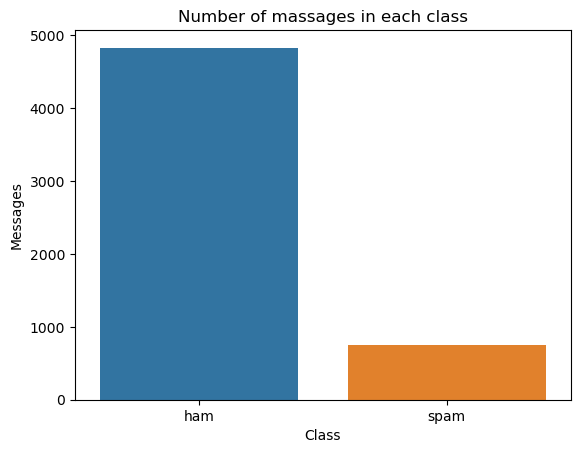

In [8]:
#bar plot
sns.countplot(data = df, x = 'Class')
plt.title('Number of massages in each class')
plt.ylabel('Messages')
plt.show()

Data is highly imbalanced. Let's check message length for each class.

In [9]:
#adding new column [Message_Length] which will contain length of each SMS
df['Message_Length'] = df['Message'].apply(len)

#adding column with number of words
df['Word_Count'] = df['Message'].apply(lambda x:len(x.split()))

#defining special characters list
special_chars_pattern = r"[!@#$%^&*()_+={}\[\]:;\"'|<>,.?/~`\\-]"

#adding column with number of special characters in a message
df['Special_Char_Count'] = df['Message'].apply(lambda x: len(re.findall(special_chars_pattern, x)))

#defining digits list
digits = r"\d+"

#adding column with number of digits in a message
df['Digits_Count'] = df['Message'].apply(lambda x: len(re.findall(digits, x)))

In [10]:
#calculating mean and median of message length in ham class
ham_mean_len = df[df['Class'] == 'ham']['Message_Length'].mean()
ham_median_len = df[df['Class'] == 'ham']['Message_Length'].median()
ham_max_len = df[df['Class'] == 'ham']['Message_Length'].max()
ham_min_len = df[df['Class'] == 'ham']['Message_Length'].min()

#calculating mean and median of message length in spam class
spam_mean_len = df[df['Class'] == 'spam']['Message_Length'].mean()
spam_median_len = df[df['Class'] == 'spam']['Message_Length'].median()
spam_max_len = df[df['Class'] == 'spam']['Message_Length'].max()
spam_min_len = df[df['Class'] == 'spam']['Message_Length'].min()

col = "Message Length"

#print calculations
print(f"Median of {col} in 'ham' class: {ham_median_len:.2f}")
print(f"Median of {col} in 'spam' class: {spam_median_len:.2f}")
print(f"Mean of {col} in 'ham' class: {ham_mean_len:.2f}")
print(f"Mean of {col} in 'spam' class: {spam_mean_len:.2f}")
print(f"Max of {col} in 'ham' class: {ham_max_len:.2f}")
print(f"Max of {col} in 'spam' class: {spam_max_len:.2f}")
print(f"Min of {col} in 'ham' class: {ham_min_len:.2f}")
print(f"Min of {col} in 'spam' class: {spam_min_len:.2f}")

Median of Message Length in 'ham' class: 52.00
Median of Message Length in 'spam' class: 149.00
Mean of Message Length in 'ham' class: 71.44
Mean of Message Length in 'spam' class: 138.63
Max of Message Length in 'ham' class: 910.00
Max of Message Length in 'spam' class: 223.00
Min of Message Length in 'ham' class: 2.00
Min of Message Length in 'spam' class: 13.00


In [11]:
#calculating mean and median of word count in ham class
ham_mean_wc = df[df['Class'] == 'ham']['Word_Count'].mean()
ham_median_wc = df[df['Class'] == 'ham']['Word_Count'].median()
ham_max_wc = df[df['Class'] == 'ham']['Word_Count'].max()
ham_min_wc = df[df['Class'] == 'ham']['Word_Count'].min()

#calculating mean and median of word count in spam class
spam_mean_wc = df[df['Class'] == 'spam']['Word_Count'].mean()
spam_median_wc = df[df['Class'] == 'spam']['Word_Count'].median()
spam_max_wc = df[df['Class'] == 'spam']['Word_Count'].max()
spam_min_wc = df[df['Class'] == 'spam']['Word_Count'].min()

col = "Word Count"

#print calculations
print(f"Median of {col} in 'ham' class: {ham_median_wc:.2f}")
print(f"Median of {col} in 'spam' class: {spam_median_wc:.2f}")
print(f"Mean of {col} in 'ham' class: {ham_mean_wc:.2f}")
print(f"Mean of {col} in 'spam' class: {spam_mean_wc:.2f}")
print(f"Max of {col} in 'ham' class: {ham_max_wc:.2f}")
print(f"Max of {col} in 'spam' class: {spam_max_wc:.2f}")
print(f"Min of {col} in 'ham' class: {ham_min_wc:.2f}")
print(f"Min of {col} in 'spam' class: {spam_min_wc:.2f}")

Median of Word Count in 'ham' class: 11.00
Median of Word Count in 'spam' class: 25.00
Mean of Word Count in 'ham' class: 14.30
Mean of Word Count in 'spam' class: 23.91
Max of Word Count in 'ham' class: 171.00
Max of Word Count in 'spam' class: 35.00
Min of Word Count in 'ham' class: 1.00
Min of Word Count in 'spam' class: 2.00


In [12]:
#calculating mean and median of special characters count in ham class
ham_mean_scc = df[df['Class'] == 'ham']['Special_Char_Count'].mean()
ham_median_scc = df[df['Class'] == 'ham']['Special_Char_Count'].median()
ham_max_scc = df[df['Class'] == 'ham']['Special_Char_Count'].max()
ham_min_scc = df[df['Class'] == 'ham']['Special_Char_Count'].min()

#calculating mean and median of special characters count in spam class
spam_mean_scc = df[df['Class'] == 'spam']['Special_Char_Count'].mean()
spam_median_scc = df[df['Class'] == 'spam']['Special_Char_Count'].median()
spam_max_scc = df[df['Class'] == 'spam']['Special_Char_Count'].max()
spam_min_scc = df[df['Class'] == 'spam']['Special_Char_Count'].min()

col = "Special Char Count"

#print calculations
print(f"Median of {col} in 'ham' class: {ham_median_scc:.2f}")
print(f"Median of {col} in 'spam' class: {spam_median_scc:.2f}")
print(f"Mean of {col} in 'ham' class: {ham_mean_scc:.2f}")
print(f"Mean of {col} in 'spam' class: {spam_mean_scc:.2f}")
print(f"Max of {col} in 'ham' class: {ham_max_scc:.2f}")
print(f"Max of {col} in 'spam' class: {spam_max_scc:.2f}")
print(f"Min of {col} in 'ham' class: {ham_min_scc:.2f}")
print(f"Min of {col} in 'spam' class: {spam_min_scc:.2f}")

Median of Special Char Count in 'ham' class: 3.00
Median of Special Char Count in 'spam' class: 5.00
Mean of Special Char Count in 'ham' class: 3.96
Mean of Special Char Count in 'spam' class: 5.72
Max of Special Char Count in 'ham' class: 133.00
Max of Special Char Count in 'spam' class: 26.00
Min of Special Char Count in 'ham' class: 0.00
Min of Special Char Count in 'spam' class: 0.00


In [13]:
df[df['Special_Char_Count'] == 133]

,Class,Message,Message_Length,Word_Count,Special_Char_Count,Digits_Count
1579,ham,How to Make a girl Happy? It's not at all difficult to make girls happy. U only need to be... 1. A friend 2. Companion 3. Lover 4. Chef . . . &lt;#&gt; . Good listener &lt;#&gt; . Organizer &lt;#&gt; . Good boyfriend &lt;#&gt; . Very clean &lt;#&gt; . Sympathetic &lt;#&gt; . Athletic &lt;#&gt; . Warm . . . &lt;#&gt; . Courageous &lt;#&gt; . Determined &lt;#&gt; . True &lt;#&gt; . Dependable &lt;#&gt; . Intelligent . . . &lt;#&gt; . Psychologist &lt;#&gt; . Pest exterminator &lt;#&gt; . Psychiatrist &lt;#&gt; . Healer . . &lt;#&gt; . Stylist &lt;#&gt; . Driver . . Aaniye pudunga venaam..,611,103,133,4


In [14]:
#calculating mean and median of digits count in ham class
ham_mean_dig = df[df['Class'] == 'ham']['Digits_Count'].mean()
ham_median_dig = df[df['Class'] == 'ham']['Digits_Count'].median()
ham_max_dig = df[df['Class'] == 'ham']['Digits_Count'].max()
ham_min_dig = df[df['Class'] == 'ham']['Digits_Count'].min()

#calculating mean and median of digits count in spam class
spam_mean_dig = df[df['Class'] == 'spam']['Digits_Count'].mean()
spam_median_dig = df[df['Class'] == 'spam']['Digits_Count'].median()
spam_max_dig = df[df['Class'] == 'spam']['Digits_Count'].max()
spam_min_dig = df[df['Class'] == 'spam']['Digits_Count'].min()

col = "Special Char Count"

#print calculations
print(f"Median of {col} in 'ham' class: {ham_median_dig:.2f}")
print(f"Median of {col} in 'spam' class: {spam_median_dig:.2f}")
print(f"Mean of {col} in 'ham' class: {ham_mean_dig:.2f}")
print(f"Mean of {col} in 'spam' class: {spam_mean_dig:.2f}")
print(f"Max of {col} in 'ham' class: {ham_max_dig:.2f}")
print(f"Max of {col} in 'spam' class: {spam_max_dig:.2f}")
print(f"Min of {col} in 'ham' class: {ham_min_dig:.2f}")
print(f"Min of {col} in 'spam' class: {spam_min_dig:.2f}")

Median of Special Char Count in 'ham' class: 0.00
Median of Special Char Count in 'spam' class: 4.00
Mean of Special Char Count in 'ham' class: 0.26
Mean of Special Char Count in 'spam' class: 4.47
Max of Special Char Count in 'ham' class: 14.00
Max of Special Char Count in 'spam' class: 12.00
Min of Special Char Count in 'ham' class: 0.00
Min of Special Char Count in 'spam' class: 0.00


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


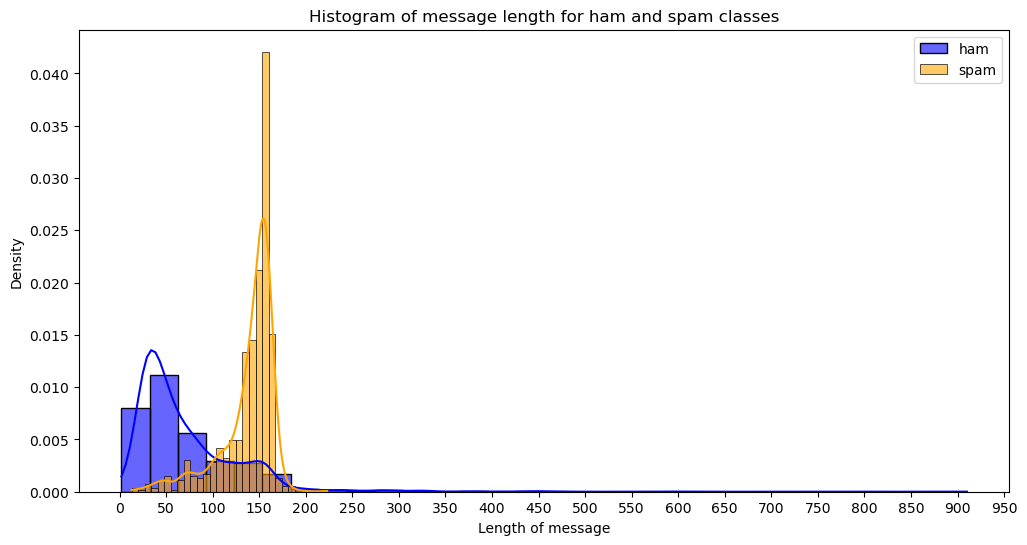

In [15]:
#histogram of message length
ham_message_length = df[df['Class'] == 'ham']['Message_Length']
spam_message_length = df[df['Class'] == 'spam']['Message_Length']

plt.figure(figsize=(12,6))

sns.histplot(ham_message_length, bins=30, color='blue', label='ham', kde=True, stat='density', alpha=0.6)
sns.histplot(spam_message_length, bins=30, color='orange', label='spam', kde=True, stat='density', alpha=0.6)

plt.title('Histogram of message length for ham and spam classes')
plt.xlabel('Length of message')
plt.ylabel('Density')
plt.xticks(np.arange(0, 1000, 50))
plt.legend()

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


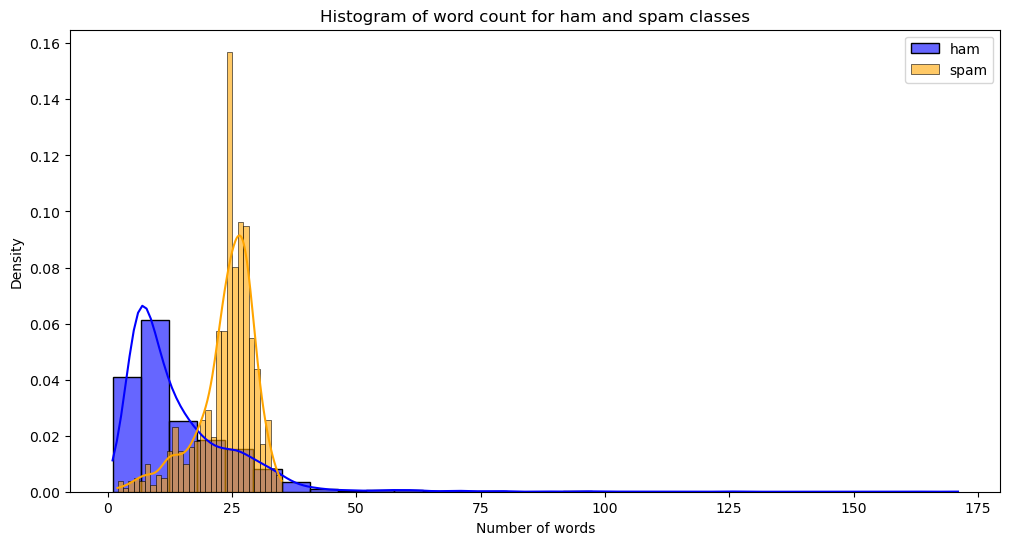

In [16]:
#histogram of word count
ham_word_count = df[df['Class'] == 'ham']['Word_Count']
spam_word_count = df[df['Class'] == 'spam']['Word_Count']

plt.figure(figsize=(12,6))

sns.histplot(ham_word_count, bins=30, color='blue', label='ham', kde=True, stat='density', alpha=0.6)
sns.histplot(spam_word_count, bins=30, color='orange', label='spam', kde=True, stat='density', alpha=0.6)

plt.title('Histogram of word count for ham and spam classes')
plt.xlabel('Number of words')
plt.ylabel('Density')
#plt.xticks(np.arange(0, 1000, 50))
plt.legend()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


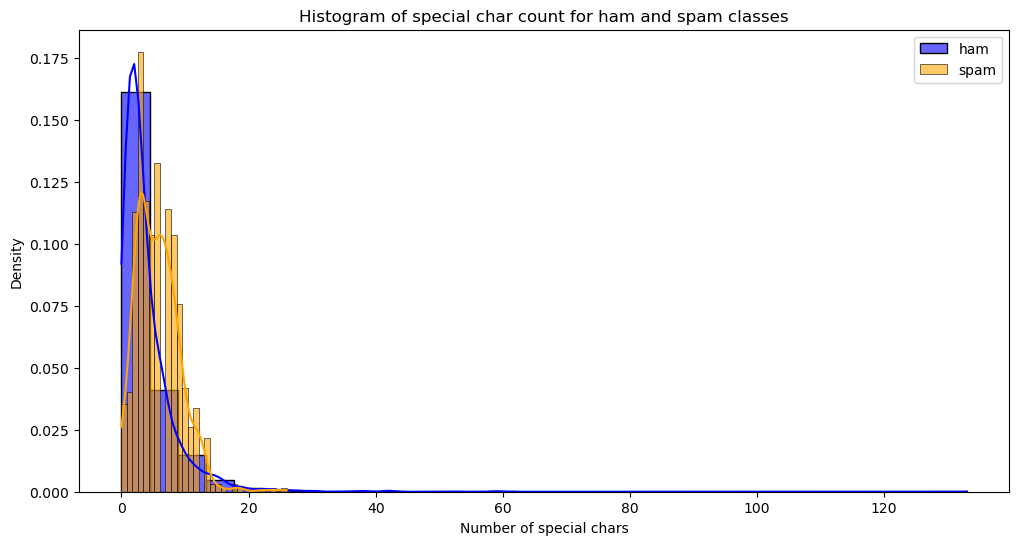

In [17]:
#histogram of special char count
ham_special_word_count = df[df['Class'] == 'ham']['Special_Char_Count']
spam_special_word_count = df[df['Class'] == 'spam']['Special_Char_Count']

plt.figure(figsize=(12,6))

sns.histplot(ham_special_word_count, bins=30, color='blue', label='ham', kde=True, stat='density', alpha=0.6)
sns.histplot(spam_special_word_count, bins=30, color='orange', label='spam', kde=True, stat='density', alpha=0.6)

plt.title('Histogram of special char count for ham and spam classes')
plt.xlabel('Number of special chars')
plt.ylabel('Density')
#plt.xticks(np.arange(0, 1000, 50))
plt.legend()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


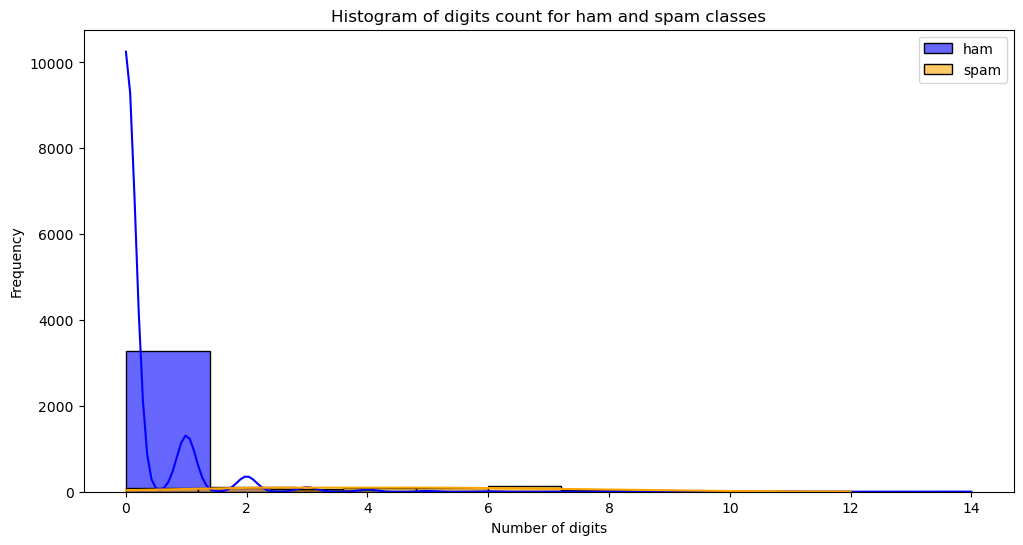

In [21]:
#histogram of digits count
ham_digits_count = df[df['Class'] == 'ham']['Digits_Count']
spam_digits_count = df[df['Class'] == 'spam']['Digits_Count']

plt.figure(figsize=(12,6))

sns.histplot(ham_digits_count, bins=10, color='blue', label='ham', kde=True, stat='frequency', alpha=0.6)
sns.histplot(spam_digits_count, bins=10, color='orange', label='spam', kde=True, stat='frequency', alpha=0.6)

plt.title('Histogram of digits count for ham and spam classes')
plt.xlabel('Number of digits')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 1000, 50))
plt.legend()

plt.show()